<a href="https://colab.research.google.com/github/WittmannF/course-v4/blob/master/book-notes/ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let's first download a utility file for setting up Google Colab
!wget https://raw.githubusercontent.com/WittmannF/course-v4/master/utils/colab_utils.py

from colab_utils import setup_fastai_colab
setup_fastai_colab()

--2020-08-30 01:22:31--  https://raw.githubusercontent.com/WittmannF/course-v4/master/utils/colab_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1426 (1.4K) [text/plain]
Saving to: ‘colab_utils.py’

colab_utils.py      100%[===================>]   1.39K  --.-KB/s    in 0s      

2020-08-30 01:22:31 (18.8 MB/s) - ‘colab_utils.py’ saved [1426/1426]

    NOTE: For debugging and visualizing stdout, please run:
    from colab_utils import *
    !{REQUIREMENTS_PIP}
    !{GIT_CLONE_REPOSITORY}
    %cd {FASTAI_NB_PATH}

Installing requirements...
Done!
Cloning FastAI Repository...
Done!
Opening folder course-v4/nbs/ with nbs and utils files...
Done!
Done!


In [1]:
!pip install fastai2

     |████████████████████████████████| 184kB 3.5MB/s 


In [2]:
%cd /content/

/content


In [3]:
from fastai2.vision.all import *

In [4]:
# Instead of using Bing Images, I built an image scraper wrapper based on this post: https://towardsdatascience.com/image-scraping-with-python-a96feda8af2d
# Some image datasets were added there, so I will be clonning it here:
!git clone https://github.com/WittmannF/image-scraper.git

Cloning into 'image-scraper'...
remote: Enumerating objects: 543, done.
remote: Counting objects: 100% (543/543), done.
remote: Compressing objects: 100% (536/536), done.
remote: Total 543 (delta 12), reused 521 (delta 3), pack-reused 0
Receiving objects: 100% (543/543), 23.58 MiB | 5.94 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [5]:
%cd image-scraper

/content/image-scraper


In [6]:
ls images

chihuahua/  dachshund/  food/  hotdog/  muffin/  pug/


In [7]:
chihuahua = glob.glob('./images/chihuahua/*.jpg')

In [8]:
import random
dest=random.choice(chihuahua)
dest

'./images/chihuahua/6437907762.jpg'

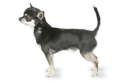

In [9]:
im=Image.open(dest)
im.to_thumb(128,128)

In [10]:
GetAttr?

In [11]:
GetAttr??

In [12]:
add_props??

In [13]:
property?

In [14]:
get_image_files?

In [15]:
ImageBlock?

In [16]:
# Get the folder name where a file is located
parent_label?

In [17]:
parent_label??

In [18]:
parent_label_new = lambda o: Path(o).parent.name

In [19]:
CategoryBlock?

In [20]:
CategoryBlock??

In [21]:
get_image_files('./images/chihuahua/')

(#96) [Path('images/chihuahua/f88c1b8e6c.jpg'),Path('images/chihuahua/f3011c0491.jpg'),Path('images/chihuahua/3d0519fa50.jpg'),Path('images/chihuahua/ce68286b5e.jpg'),Path('images/chihuahua/d0009764aa.jpg'),Path('images/chihuahua/6e717a9fd4.jpg'),Path('images/chihuahua/4ffbd49ace.jpg'),Path('images/chihuahua/68769d2f7f.jpg'),Path('images/chihuahua/e066b7826e.jpg'),Path('images/chihuahua/cb8527edab.jpg')...]

In [22]:
len(get_image_files('./images/chihuahua/'))

96

In [23]:
len(get_image_files('./images/'))

504

In [24]:
len(get_image_files('./images/', recurse=False))

0

In [25]:
RandomSplitter?

In [26]:
dbk = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [27]:
dbk.dataloaders?

In [28]:
dls=dbk.dataloaders('./images/')

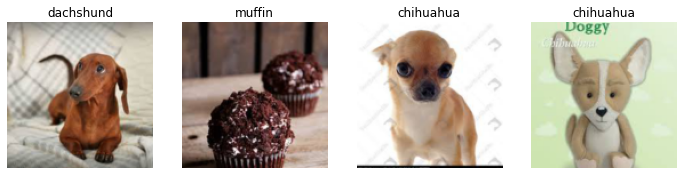

In [29]:
dls.valid.show_batch(max_n=4, nrows=1)

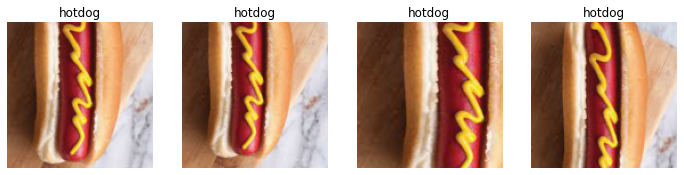

In [30]:
dbk = dbk.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls=dbk.dataloaders('./images/')
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [31]:
aug_transforms??

In [32]:
dbk = dbk.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), 
              batch_tfms=aug_transforms())
dls=dbk.dataloaders('./images/')

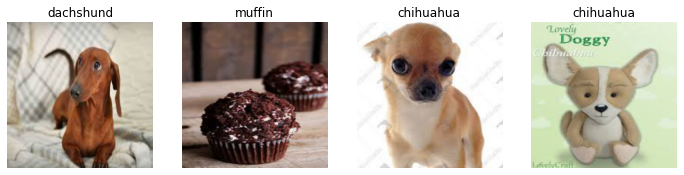

In [33]:
dls.valid.show_batch(max_n=4, nrows=1)

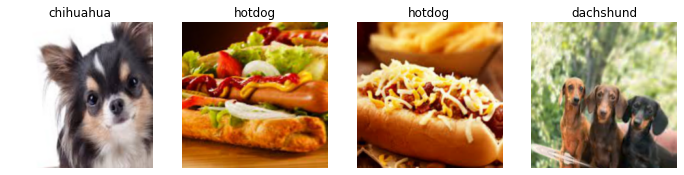

In [34]:
dls.train.show_batch(max_n=4, nrows=1)

In [35]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [36]:
interp = ClassificationInterpretation.from_learner(learn)

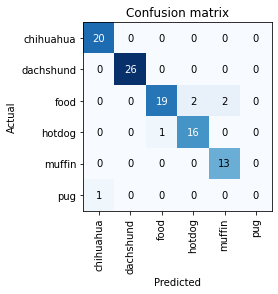

In [37]:
interp.plot_confusion_matrix()

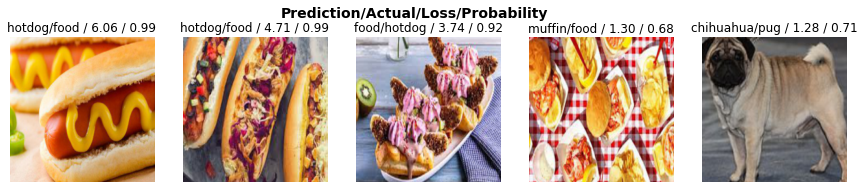

In [38]:
interp.plot_top_losses(5, nrows=1)

In [50]:
interp.plot_top_losses??

In [39]:
from fastai2.vision.widgets import *

In [40]:
cleaner = ImageClassifierCleaner(learn)

In [41]:
cleaner

In [42]:
cleaner.fns?

In [43]:
cleaner.delete()

(#0) []

In [ ]:
for idx in cleaner.delete():
    cleaner.fns[idx].unlink()

In [47]:
cleaner.change()

(#1) [(0, 'food')]

In [ ]:
cleaner.fns[0]

Path('images/food/6516659d50.jpg')

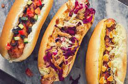

In [45]:
im=Image.open('images/food/6516659d50.jpg')
im.to_thumb(128,128)

In [48]:
for idx, cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), 'images/'+cat)

In [51]:
dbk = dbk.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), 
              batch_tfms=aug_transforms())
dls=dbk.dataloaders('./images/')
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

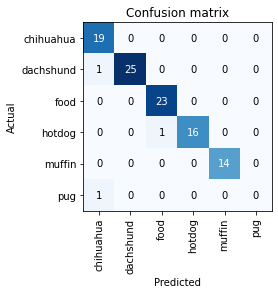

In [52]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

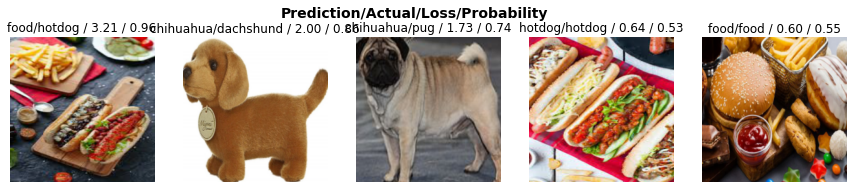

In [53]:
interp.plot_top_losses(5, nrows=1)

In [54]:
learn.export()

In [55]:
ls

export.pkl  images/  image_scraper.py  README.md  requirements.txt


In [56]:
%reset -f

In [57]:
ls

export.pkl  images/  image_scraper.py  README.md  requirements.txt


In [4]:
!pip install fastai2

     |████████████████████████████████| 184kB 7.2MB/s 


In [5]:
from fastai2.vision.all import *

In [1]:
!wget https://github.com/WittmannF/course-v4/raw/master/book-notes/export.pkl

--2020-08-30 15:40:52--  https://github.com/WittmannF/course-v4/raw/master/book-notes/export.pkl
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/WittmannF/course-v4/master/book-notes/export.pkl [following]
--2020-08-30 15:40:53--  https://raw.githubusercontent.com/WittmannF/course-v4/master/book-notes/export.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47031349 (45M) [application/octet-stream]
Saving to: ‘export.pkl’

export.pkl          100%[===================>]  44.85M   109MB/s    in 0.4s    

2020-08-30 15:40:56 (109 MB/s) - ‘export.pkl’ saved [47031349/47031349]



In [9]:
learn_inf = load_learner('export.pkl')

In [6]:
!wget https://media4.s-nbcnews.com/j/newscms/2016_10/1008761/chihuahua-muffin-today-160311-tease-02_15277fe1b7a8c911f94700f866189fc2.social_share_1024x768_scale.jpg -O muffin_chihuaua.jpg

--2020-08-30 15:42:55--  https://media4.s-nbcnews.com/j/newscms/2016_10/1008761/chihuahua-muffin-today-160311-tease-02_15277fe1b7a8c911f94700f866189fc2.social_share_1024x768_scale.jpg
Resolving media4.s-nbcnews.com (media4.s-nbcnews.com)... 23.194.13.230, 2a02:26f0:3100:3ab::a1d, 2a02:26f0:3100:38a::a1d
Connecting to media4.s-nbcnews.com (media4.s-nbcnews.com)|23.194.13.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59842 (58K) [image/jpeg]
Saving to: ‘muffin_chihuaua.jpg’

muffin_chihuaua.jpg 100%[===================>]  58.44K  --.-KB/s    in 0.02s   

2020-08-30 15:42:56 (3.44 MB/s) - ‘muffin_chihuaua.jpg’ saved [59842/59842]



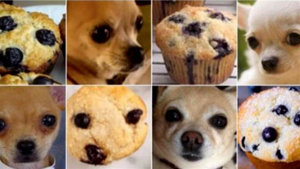

In [7]:
im=Image.open('muffin_chihuaua.jpg')
im.to_thumb(300,300)

In [10]:
learn_inf.predict('muffin_chihuaua.jpg')

('chihuahua',
 tensor(0),
 tensor([9.9993e-01, 1.0554e-05, 2.4583e-09, 4.1690e-09, 5.5154e-05, 4.0064e-06]))

In [11]:
learn_inf.dls.vocab

(#6) ['chihuahua','dachshund','food','hotdog','muffin','pug']

In [63]:
from fastai2.vision.widgets import *

In [64]:
btn_upload=widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [65]:
img=PILImage.create(btn_upload.data[-1])

In [66]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl:
    display(img.to_thumb(128,128))
out_pl

Output()

In [67]:
pred,pred_idx,probs=learn_inf.predict(img)

In [68]:
f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

'Prediction: dachshund; Probability: 0.9994'

In [69]:
lbl_pred=widgets.Label()
lbl_pred.value=f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: dachshund; Probability: 0.9994')

In [70]:
btn_run=widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [71]:
def on_click_classify(change):
    img=PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl:
        display(img.to_thumb(128,128))
    pred,pred_idx,probs=learn_inf.predict(img)
    lbl_pred.value=f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [72]:
btn_run.on_click(on_click_classify)

In [73]:
btn_run

Button(description='Classify', style=ButtonStyle())

In [74]:
VBox([
      widgets.Label('Select your picture!'),
      btn_upload,
      btn_run,
      out_pl,
      lbl_pred
])